
# Thực hành: Phân tích & Trực quan dữ liệu với Python (NumPy • Pandas • Matplotlib • Seaborn)

Notebook này tổng hợp các nội dung thực hành trong slide **"KTLTSP – Hiển thị và phân tích dữ liệu với Python"** để bạn chạy lại trên **JupyterLab** (hoặc Colab).  
Mỗi phần có hướng dẫn ngắn + mã nguồn mẫu. Bạn có thể `Run All` từ trên xuống.

> **Yêu cầu môi trường**
> - Python 3.9+ (khuyến nghị)
> - Thư viện: `numpy`, `pandas`, `matplotlib`, `seaborn`, `scikit-learn`
> - Nếu thiếu thư viện, dùng lệnh cài đặt ở ô tiếp theo (bỏ comment và chạy).


In [9]:

# Nếu thiếu gói, bỏ comment từng dòng và chạy:
# !pip install numpy pandas matplotlib seaborn scikit-learn


In [10]:

# Kiểm tra phiên bản thư viện
import sys, numpy as np, pandas as pd, matplotlib, seaborn as sns, sklearn
print("Python :", sys.version.split()[0])
print("NumPy  :", np.__version__)
print("Pandas :", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", sns.__version__)
print("scikit-learn:", sklearn.__version__)


Python : 3.12.1
NumPy  : 2.3.1
Pandas : 2.3.1
Matplotlib: 3.10.3
Seaborn: 0.13.2
scikit-learn: 1.7.0


## 1) NumPy cơ bản — mảng N chiều, broadcasting, vector hóa

In [11]:

import numpy as np

# Tạo mảng
a = np.array([1, 2, 3], dtype=np.int64)
b = np.arange(0, 12).reshape(3, 4)  # 3x4
c = np.linspace(0, 1, 5)            # 5 điểm đều nhau từ 0 đến 1

print("a:", a, "shape:", a.shape, "dtype:", a.dtype)
print("b:\n", b, "\nshape:", b.shape)
print("c:", c)

# Toán tử vector hoá
print("a + 10:", a + 10)
print("b * 2:\n", b * 2)

# Broadcasting
v = np.array([1, 0, -1, 2])         # sẽ broadcast theo cột của b (3x4)
print("b + v:\n", b + v)

# Chỉ số & cắt lát
print("b[1, 2] =", b[1, 2])
print("b[:, 1:3] =\n", b[:, 1:3])

# Mặt nạ boolean
mask = b % 2 == 0
print("Các phần tử chẵn trong b:", b[mask])

# Thống kê nhanh
print("mean b:", b.mean(), "std b:", b.std(), "sum trục 0:", b.sum(axis=0))

# Tích vô hướng / ma trận
x = np.random.randn(5)
y = np.random.randn(5)
print("dot(x, y) =", np.dot(x, y))

M = np.random.randn(3, 3)
print("det(M) ≈", np.linalg.det(M))
print("eig(M):", np.linalg.eigvals(M))


a: [1 2 3] shape: (3,) dtype: int64
b:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 
shape: (3, 4)
c: [0.   0.25 0.5  0.75 1.  ]
a + 10: [11 12 13]
b * 2:
 [[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]]
b + v:
 [[ 1  1  1  5]
 [ 5  5  5  9]
 [ 9  9  9 13]]
b[1, 2] = 6
b[:, 1:3] =
 [[ 1  2]
 [ 5  6]
 [ 9 10]]
Các phần tử chẵn trong b: [ 0  2  4  6  8 10]
mean b: 5.5 std b: 3.452052529534663 sum trục 0: [12 15 18 21]
dot(x, y) = 3.102699449069467
det(M) ≈ 0.42869918576013405
eig(M): [ 0.60705813+0.j         -0.05268634+0.83869868j -0.05268634-0.83869868j]


## 2) Pandas cơ bản — Series, DataFrame, thao tác dữ liệu

In [12]:

import pandas as pd
import numpy as np

# Series & DataFrame
s = pd.Series([10, 20, 30], index=["A", "B", "C"])
df = pd.DataFrame({
    "name": ["Ann", "Bob", "Cat", "Dan"],
    "age": [23, 31, 29, 40],
    "city": ["HN", "HCM", "DN", "HCM"],
    "score": [8.5, 7.2, 9.0, 6.8],
})

print("Series:")
display(s)
print("DataFrame:")
display(df)

# Chọn lọc
display(df[["name", "city"]])
display(df.loc[df["age"] >= 30, ["name", "age"]])
display(df.sort_values("score", ascending=False))

# Thêm/sửa cột
df["is_adult"] = df["age"] >= 18
df["score_z"] = (df["score"] - df["score"].mean()) / df["score"].std()
display(df)

# GroupBy
g = df.groupby("city")["score"].agg(["count", "mean", "median"])
display(g)

# Gộp (merge/join)
left = pd.DataFrame({"id":[1,2,3], "city":["HN","HCM","DN"]})
right = pd.DataFrame({"city":["HN","HCM","HP"], "region":["Bac","Nam","Bac"]})
display(pd.merge(left, right, how="left", on="city"))


Series:


A    10
B    20
C    30
dtype: int64

DataFrame:


,name,age,city,score
0,Ann,23,HN,8.5
1,Bob,31,HCM,7.2
2,Cat,29,DN,9.0
3,Dan,40,HCM,6.8


,name,city
0,Ann,HN
1,Bob,HCM
2,Cat,DN
3,Dan,HCM


,name,age
1,Bob,31
3,Dan,40


,name,age,city,score
2,Cat,29,DN,9.0
0,Ann,23,HN,8.5
1,Bob,31,HCM,7.2
3,Dan,40,HCM,6.8


,name,age,city,score,is_adult,score_z
0,Ann,23,HN,8.5,True,0.598870
1,Bob,31,HCM,7.2,True,-0.646780
2,Cat,29,DN,9.0,True,1.077967
3,Dan,40,HCM,6.8,True,-1.030057


,count,mean,median
city,,,
DN,1,9.0,9.0
HCM,2,7.0,7.0
HN,1,8.5,8.5


,id,city,region
0,1,HN,Bac
1,2,HCM,Nam
2,3,DN,NaN


## 3) Trực quan với Matplotlib — line, bar, hist, box, scatter

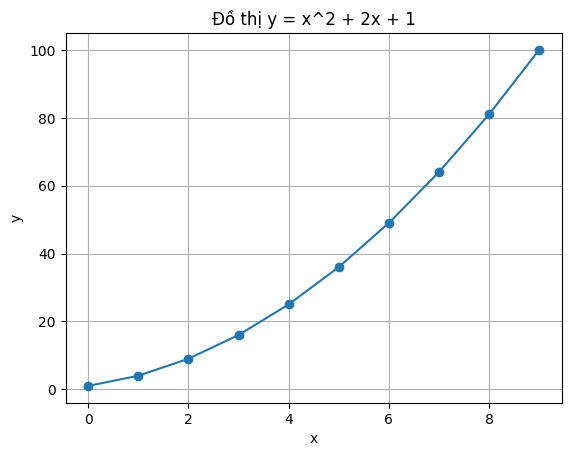

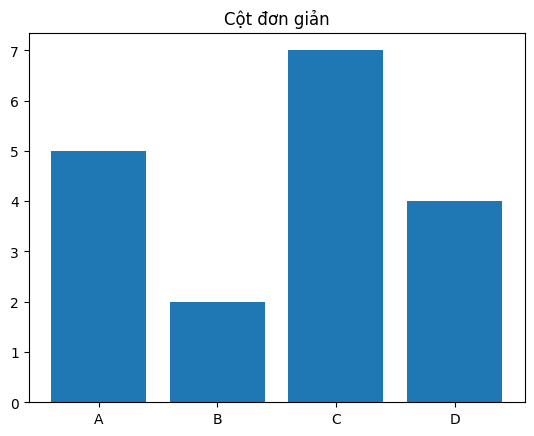

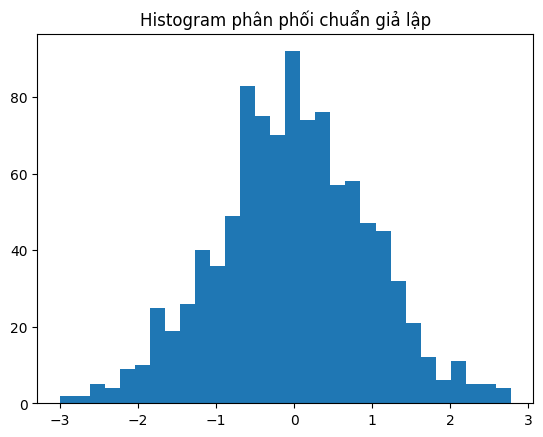

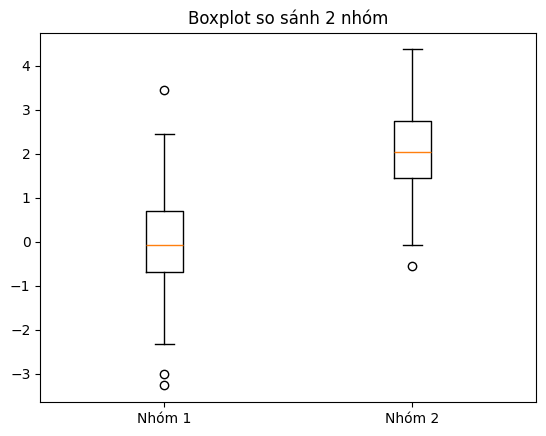

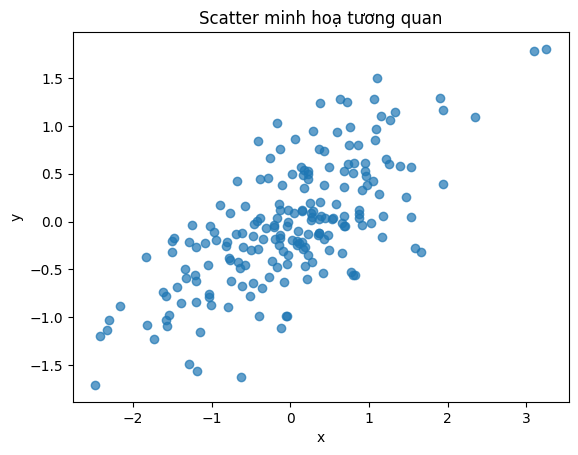

In [13]:

import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu mẫu
x = np.arange(0, 10)
y = x**2 + 2*x + 1

# Line plot
plt.figure()
plt.plot(x, y, marker="o")
plt.title("Đồ thị y = x^2 + 2x + 1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Bar chart
cats = ["A","B","C","D"]
vals = [5, 2, 7, 4]
plt.figure()
plt.bar(cats, vals)
plt.title("Cột đơn giản")
plt.show()

# Histogram
data = np.random.randn(1000)
plt.figure()
plt.hist(data, bins=30)
plt.title("Histogram phân phối chuẩn giả lập")
plt.show()

# Boxplot
plt.figure()
plt.boxplot([np.random.randn(200), np.random.randn(200) + 2])
plt.xticks([1,2], ["Nhóm 1", "Nhóm 2"])
plt.title("Boxplot so sánh 2 nhóm")
plt.show()

# Scatter
x = np.random.randn(200)
y = 0.5*x + np.random.randn(200)*0.5
plt.figure()
plt.scatter(x, y, alpha=0.7)
plt.title("Scatter minh hoạ tương quan")
plt.xlabel("x"); plt.ylabel("y")
plt.show()


## 4) Seaborn — biểu đồ nâng cao, pairplot, heatmap tương quan

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


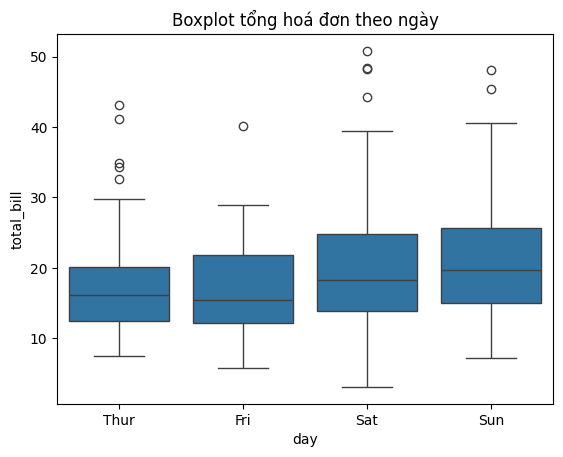

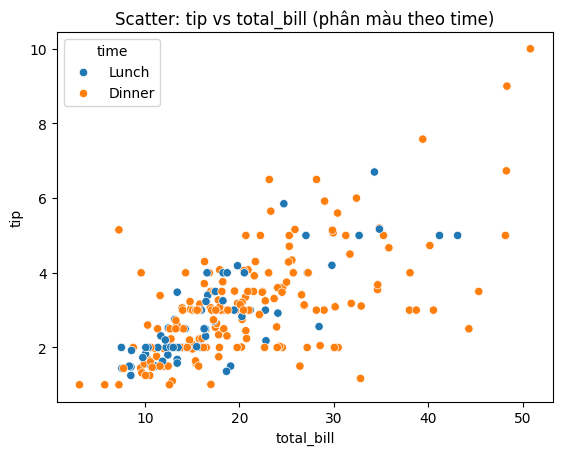

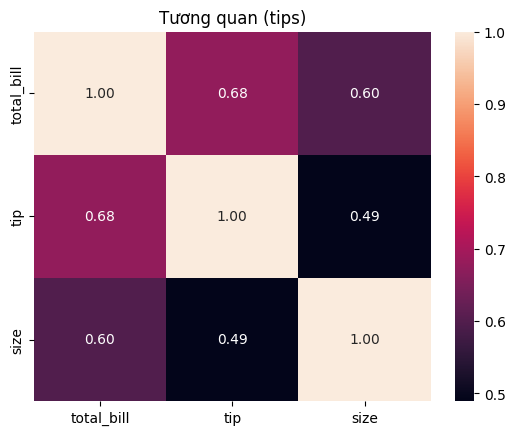

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dữ liệu tips có sẵn trong seaborn (cần internet trong 1 số môi trường).
# Nếu lỗi, bạn có thể dùng iris ở phần sau.
try:
    tips = sns.load_dataset("tips")
    display(tips.head())
    plt.figure()
    sns.boxplot(x="day", y="total_bill", data=tips)
    plt.title("Boxplot tổng hoá đơn theo ngày")
    plt.show()

    plt.figure()
    sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips)
    plt.title("Scatter: tip vs total_bill (phân màu theo time)")
    plt.show()

    # Heatmap tương quan
    corr = tips.select_dtypes(include="number").corr(numeric_only=True)
    plt.figure()
    sns.heatmap(corr, annot=True, fmt=".2f")
    plt.title("Tương quan (tips)")
    plt.show()
except Exception as e:
    print("Không tải được tips từ seaborn:", e)
    print("Bỏ qua ví dụ tips. Hãy dùng phần Iris bên dưới.")


## 5) Case study: Iris — đọc dữ liệu, mô tả, đồ thị, pairplot

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


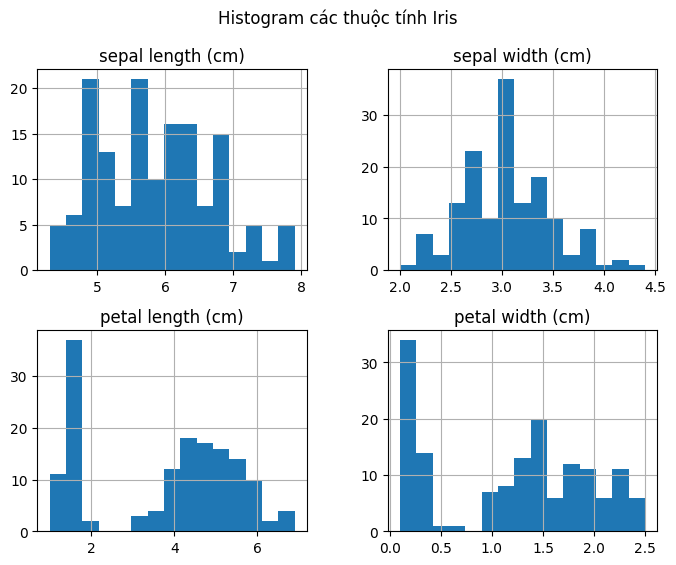

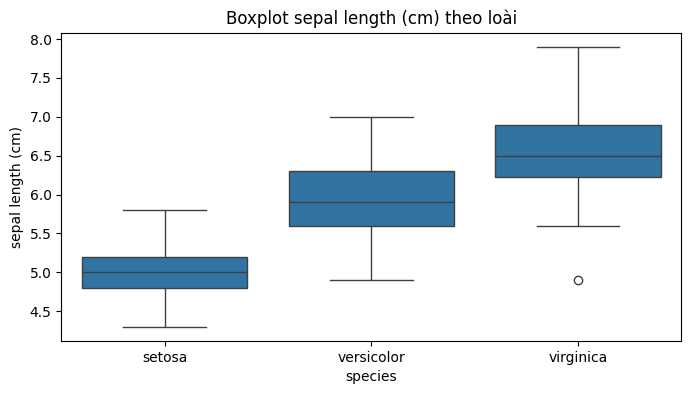

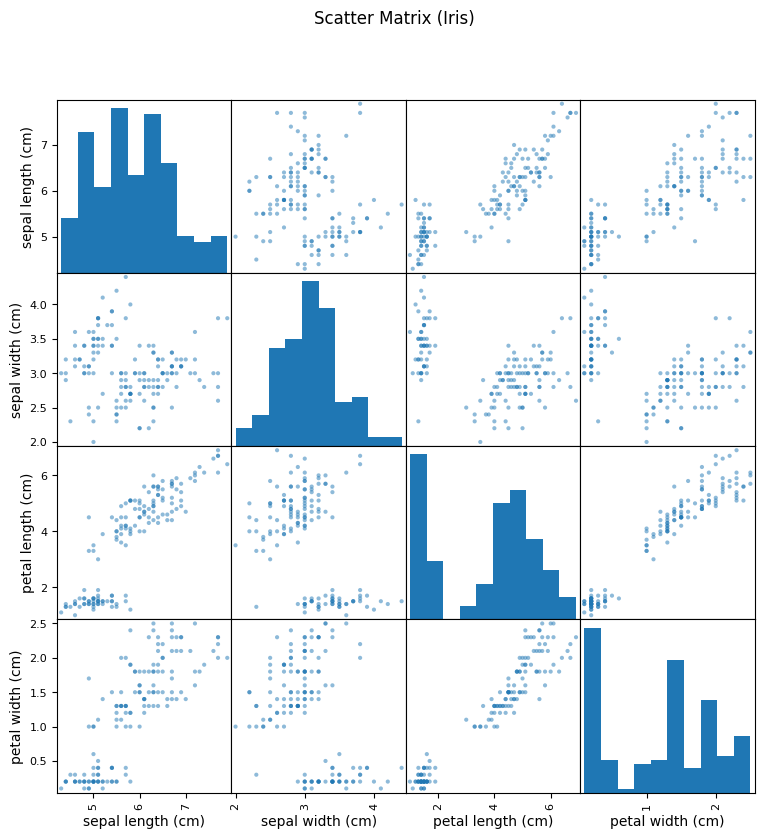

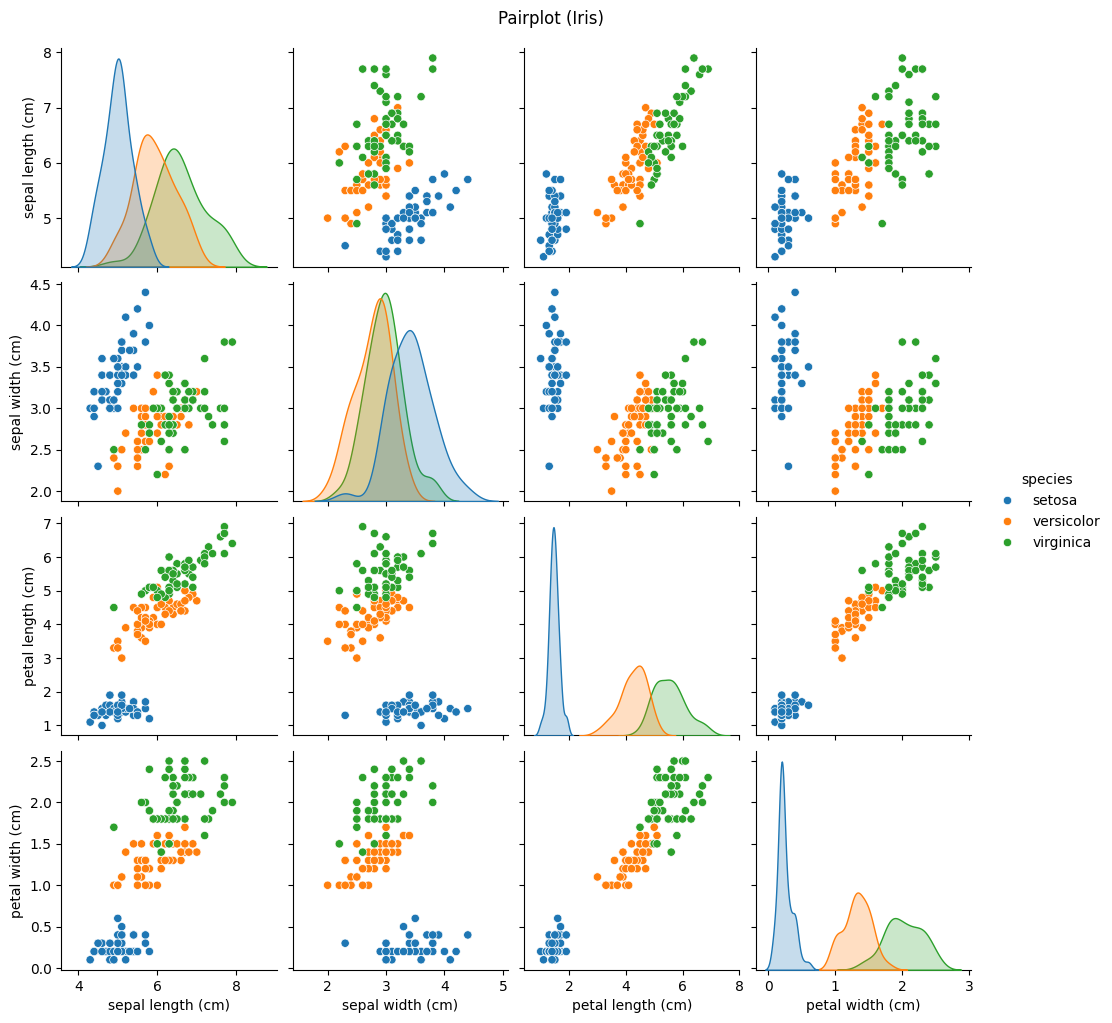

/tmp/ipykernel_2571/913368748.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = df_iris.groupby("species").mean(numeric_only=True)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [15]:

from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Tải Iris từ scikit-learn (offline, không cần internet)
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)

display(df_iris.head())
display(df_iris.describe())

# Histogram cho từng thuộc tính
df_iris[iris.feature_names].hist(figsize=(8,6), bins=15)
plt.suptitle("Histogram các thuộc tính Iris")
plt.show()

# Boxplot theo species
plt.figure(figsize=(8,4))
sns.boxplot(x="species", y=iris.feature_names[0], data=df_iris)
plt.title(f"Boxplot {iris.feature_names[0]} theo loài")
plt.show()

# Scatter matrix (pandas)
scatter_matrix(df_iris[iris.feature_names], figsize=(9,9), diagonal='hist')
plt.suptitle("Scatter Matrix (Iris)")
plt.show()

# Pairplot (seaborn)
sns.pairplot(df_iris, hue="species")
plt.suptitle("Pairplot (Iris)", y=1.02)
plt.show()

# Nhóm theo loài
group_stats = df_iris.groupby("species").mean(numeric_only=True)
display(group_stats)



## 6) Mini project: Sổ thu–chi (Pandas)

Mục tiêu: tạo một bảng thu–chi nhỏ, tính **tổng**, **theo danh mục**, **theo tháng**, và vẽ biểu đồ.

- Cột gợi ý: `date`, `desc`, `category`, `amount` (âm = chi, dương = thu).
- Có kèm file CSV mẫu `so_thu_chi_mau.csv` để bạn thử đọc lại.


In [16]:

import pandas as pd
from pathlib import Path

# Tạo dữ liệu mẫu
data = [
    ("2025-08-01", "Lương", "Thu nhập", 15000000),
    ("2025-08-02", "Cà phê", "Ăn uống", -35000),
    ("2025-08-03", "Siêu thị", "Mua sắm", -450000),
    ("2025-08-04", "Ăn trưa", "Ăn uống", -55000),
    ("2025-08-05", "Freelance", "Thu nhập", 3000000),
    ("2025-08-08", "Xăng xe", "Đi lại", -80000),
    ("2025-08-10", "Điện", "Hoá đơn", -420000),
    ("2025-08-15", "Nước", "Hoá đơn", -120000),
    ("2025-08-20", "Mua sách", "Giáo dục", -150000),
]

df_wallet = pd.DataFrame(data, columns=["date","desc","category","amount"])
df_wallet["date"] = pd.to_datetime(df_wallet["date"])
display(df_wallet)

# Lưu CSV mẫu vào cùng thư mục với notebook
csv_path = Path("/mnt/data/so_thu_chi_mau.csv")
df_wallet.to_csv(csv_path, index=False)
print("Đã lưu file CSV mẫu:", csv_path)

# Tổng thu/chi & số dư
total_income = df_wallet.loc[df_wallet["amount"] > 0, "amount"].sum()
total_expense = - df_wallet.loc[df_wallet["amount"] < 0, "amount"].sum()
balance = df_wallet["amount"].sum()
print(f"Tổng thu: {total_income:,.0f} VND")
print(f"Tổng chi: {total_expense:,.0f} VND")
print(f"Số dư:    {balance:,.0f} VND")

# Theo danh mục
by_cat = df_wallet.groupby("category")["amount"].sum().sort_values()
display(by_cat.to_frame("total"))

# Theo tháng (pivot)
df_wallet["month"] = df_wallet["date"].dt.to_period("M").astype(str)
pivot_month = df_wallet.pivot_table(index="month", values="amount", aggfunc="sum")
display(pivot_month)

# Biểu đồ cột theo danh mục
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
by_cat.plot(kind="bar")
plt.title("Tổng thu/chi theo danh mục")
plt.ylabel("VND (+ thu, - chi)")
plt.tight_layout()
plt.show()


,date,desc,category,amount
0,2025-08-01,Lương,Thu nhập,15000000
1,2025-08-02,Cà phê,Ăn uống,-35000
2,2025-08-03,Siêu thị,Mua sắm,-450000
3,2025-08-04,Ăn trưa,Ăn uống,-55000
4,2025-08-05,Freelance,Thu nhập,3000000
5,2025-08-08,Xăng xe,Đi lại,-80000
6,2025-08-10,Điện,Hoá đơn,-420000
7,2025-08-15,Nước,Hoá đơn,-120000
8,2025-08-20,Mua sách,Giáo dục,-150000


OSError: Cannot save file into a non-existent directory: '/mnt/data'


### Đọc lại từ CSV và tiếp tục xử lý

Bạn có thể import file `so_thu_chi_mau.csv` (đã tạo ở trên) và tiếp tục phân tích.


In [ ]:

import pandas as pd
from pathlib import Path

csv_path = Path("/mnt/data/so_thu_chi_mau.csv")
df2 = pd.read_csv(csv_path, parse_dates=["date"])
display(df2.head())
print("Số dòng:", len(df2))

# Ví dụ: lọc các khoản chi > 100k
big_spend = df2[(df2["amount"] < 0) & (df2["amount"].abs() > 100000)]
display(big_spend)



## 7) Bài tập gợi ý (tự luyện)
- Viết hàm NumPy để chuẩn hoá mảng về khoảng [0,1].
- Với Iris, vẽ **boxplot tất cả cột** theo `species` trên cùng một Figure (dùng `pd.melt`/`sns.boxplot`).
- Từ `so_thu_chi_mau.csv`, tạo **biểu đồ tròn** cho cơ cấu chi tiêu (chỉ lấy các khoản âm).
- Tự tạo thêm danh mục & lọc tháng hiện tại, vẽ đường **số dư tích luỹ theo ngày**.
- Dùng `groupby` + `agg` nhiều hàm (min, max, mean) cho bảng bất kỳ.



---
*Auto-generated on 2025-08-23 07:12.*  
Bạn có thể chỉnh sửa tuỳ ý sau khi tải về.
